<a href="https://colab.research.google.com/github/atejap05/pos_data_science_furg/blob/main/An%C3%A1lise_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Tweets
> Por Marcelo Pias


<img width=480 src="https://miro.medium.com/max/450/1*p3Ste5R_iJzi5IcSmFkmtg.jpeg"> </img>



**IMPORTANTE: você deve salvar este notebook localmente (computador ou Google Drive) para poder trabalhar nos exercícios. Basta clicar no Menu Arquivo-> Salvar cópia no Drive.**

# Jupyter Notebooks

Antes de entrarmos no tópico de **análise de tweets**, é importante relembrarmos sobre o nosso ambiente de desenvolvimento **Jupyter Notebook** no Google Colaboratory. Este ambiente, neste momento sendo utilizado, permite criar um documento com células contendo texto, imagens e "pedaços" de código em uma linguagem de programação como Python. 

O **notebook** que iremos explorar neste laboratório encontra-se em uma plataforma na nuvem, neste caso, o Google Colab. Sempre que aparecer a célula como a mostrada abaixo, com dois colchetes [], indica que é uma célula de código em Python. Basta clicar nesta e usar a combinação das teclas SHIFT+ENTER com intuito de executar o código. 

Agora tente você mesmo na célula abaixo. Posicione o curso do mouse na célula, e pressione simultaneamente SHIFT+ENTER. O código será executado:


In [1]:
print('Hello World')

Hello World



<img src="https://sd.keepcalms.com/i/keep-calm-and-viva-sao-joao.png" width=240> </img>

Neste contato com este Jupyter Notebook, exploraremos o **óbvio** ao executar o código Python que foi pré-preenchido na célula. Portanto, fique tranquil* pois o importante é apenas executar a célula com SHIFT+ENTER, e como bônus, se possível tentar entender o que está sendo feito à medida que avançamos no material. De certa forma, o resultado em cada célula já deve ser revelador. Novamente, Mantenha a Calma e controle o Pânico ;)


# Minerando o Twitter

A interface, chamada de API, que nos permite acessar os dados do Twitter trabalha com um método de autenticação de usuário. Tal método é utilizado para garantir que o usuário é conhecido ao sistema, e tem autorização para acessar os dados. O Twitter implementa o mecanismo de autenticação chamado OAuth 1.0A. 
Para facilitar nosso trabalho didático, utilizaremos os identificadores OAuth 1.0A associados à uma conta existente do Twitter (com a devida autorização do mesmo).Estas credenciais estão auto-preenchidas abaixo. 

## Credenciais para acessar uma conta do Twitter

Primeiramente, precisamos importar o módulo *twitter.*

In [3]:
import twitter

# Abaixo temos os dados das quatro variáveis OAuth 1.0A
# Estas credenciais foram pré-preenchidas para facilitar nosso trabalho.

CONSUMER_KEY = 'SYFpddpGiwLKmMBaUPellGXki'
CONSUMER_SECRET = 'llbWAFXd5CRvK5GVYwvDPV2dpsHrkz2CVmG5ESXXSg13hnWGJx'
OAUTH_TOKEN = '234736278-xdQ9DJ3fNTcyRElqD6mNvCFOfyIWgsp9rGvsFPBv'
OAUTH_TOKEN_SECRET = '0hE4P481ByaOGsiIW95DyEqZfXmQmKtVpJ68GOzwMf896'

# O método abaixo cria o objeto auth que está relacionado ao usuário autenticado
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# A linha abaixo apenas mostra que twitter_api é uma variável definida (objeto)

print(twitter_api)

## Busca por tópicos com tendências

In [4]:
# Para representar uma localização, utilizamos um tipo de identificação criada
# pelo Yahoo! chamada de 'Where On Earth ID' (ID de onde no Planeta?). 
# O WOE ID para o mundo é o valor 1.
# Ao consultar as URLs https://dev.twitter.com/docs/api/1.1/get/trends/place e
# http://developer.yahoo.com/geo/geoplanet/
# Podemos encontrar o ID para o Brasil, sendo o valor 23424768

WORLD_WOE_ID = 1
BR_WOE_ID = 23424768				

# Busca-se os tópicos de tendência para o Mundo e Brasil					
tendencia_mundo = twitter_api.trends.place(_id=WORLD_WOE_ID)
tendencia_br = twitter_api.trends.place(_id=BR_WOE_ID)

print(tendencia_mundo)
print()
print(tendencia_br)	


[{'trends': [{'name': '#SmackDown', 'url': 'http://twitter.com/search?q=%23SmackDown', 'promoted_content': None, 'query': '%23SmackDown', 'tweet_volume': 62778}, {'name': 'Alison', 'url': 'http://twitter.com/search?q=Alison', 'promoted_content': None, 'query': 'Alison', 'tweet_volume': 22854}, {'name': '#SVFinal2', 'url': 'http://twitter.com/search?q=%23SVFinal2', 'promoted_content': None, 'query': '%23SVFinal2', 'tweet_volume': 218242}, {'name': '東海大相模', 'url': 'http://twitter.com/search?q=%E6%9D%B1%E6%B5%B7%E5%A4%A7%E7%9B%B8%E6%A8%A1', 'promoted_content': None, 'query': '%E6%9D%B1%E6%B5%B7%E5%A4%A7%E7%9B%B8%E6%A8%A1', 'tweet_volume': 26445}, {'name': 'Noruega', 'url': 'http://twitter.com/search?q=Noruega', 'promoted_content': None, 'query': 'Noruega', 'tweet_volume': 22906}, {'name': '#FinalPowerCouple', 'url': 'http://twitter.com/search?q=%23FinalPowerCouple', 'promoted_content': None, 'query': '%23FinalPowerCouple', 'tweet_volume': None}, {'name': 'HIPAA', 'url': 'http://twitter.co

Os tópicos em tendência encontram-se armazenados em *tendencia_mundo*, na lista *trends* como visto acima. O *loop* abaixo percorre essa lista, e imprime cada elemento. Como resultado temos a lista de tópicos para o mundo todo (ID WOE = 1). 

In [5]:
for trend in tendencia_mundo[0]['trends']:
    print(trend['name'])

#SmackDown
Alison
#SVFinal2
東海大相模
Noruega
#FinalPowerCouple
HIPAA
Ferrugem
#पूर्णगुरु_की_पहचान
#DateLGBTQ
山名さん
ホッケー
Olga
Gabriela
JagatGuru Sant Rampal Ji
Berk Tosun Alaçatıda
あーりん
Handebol
まきちゃん
門馬監督
Alaçatı Yaniyür
アーチェリー
甲子園春夏連覇
Rolling Loud
Globo
男子ロードレース
ピクトグラム50個パフォーマンス
Devers
Nathalie
民放オリンピック公式動画サイト
Judô
陽性17人
Wallstedt
自転車競技
Seth Jones
Eklund
Blueface
Vôlei
開会式スマホ禁止ルール
Brad Hazzard
Owen Power
山名くん
Balor
アキナ山名
Toni Storm
VAI BRASIL
Virgínia
Ippon
Tyler Boucher
Duda


O *loop* abaixo percorre a lista de tópicos armazenada em *trends* na variável *tendencia_br*. 

In [6]:
for trend in tendencia_br[0]['trends']:
    print(trend['name'])

Alison
Noruega
#FinalPowerCouple
Ferrugem
#DateLGBTQ
Gabriela
#TimeBrasil
Handebol
Nathalie
#Handball
#Judo
Ippon
Globo
Vôlei
Esgrima
Duda
Virgínia
VAI BRASIL
Canadá
Diogo Nogueira
RBD EM FORTALEZA
Bora Brasil
Chiuffa
Jade Barbosa
Capogrosso
Mamute
Bernardinho
Serginho
Jorge
MC LOMA
Boa Chico
tunisia
TAINÁ NO PODPAH
garrett
FEAR STREET NA COMIC
Alvinho
Cléber Machado
elle kennedy
Renato Freitas
He-Man
Malawi
Luiz Adriano
Zaytsev
haikyuu
praia Brasil
aron piper
LADDYNADA COM STERELLA
Ginástica
enrico
Lucas Lima


Muitas das vezes os tópicos em um país como o Brasil também estão também em tendência na lista mundial. O código Phyton abaixo busca exatamente esta intersecção entre tópicos do Brasil e Mundo. 

In [7]:
# Define conjunto com tend^ncias mundias
conj_tendencias_mundo = set([trend['name'] 
                        for trend in tendencia_mundo[0]['trends']])

# Define conjunto com tendências no Brasil
conj_tendencias_br = set([trend['name'] 
                     for trend in tendencia_br[0]['trends']]) 

# Abaixo fazemos a intersecção entre dois conjuntos
tendencias_comum = conj_tendencias_mundo.intersection(conj_tendencias_br)

print(tendencias_comum)

{'Nathalie', '#DateLGBTQ', '#FinalPowerCouple', 'Ippon', 'VAI BRASIL', 'Alison', 'Ferrugem', 'Handebol', 'Vôlei', 'Globo', 'Gabriela', 'Noruega', 'Duda', 'Virgínia'}


## Anatomia de um Tweet

Podemos especificar um texto para pesquisa como um tópico em tendência. Se setarmos a variável *q* abaixo, podemos pesquisar por um conteúdo. Neste momento a palavra 'Portugal' está em alta, e com isto utilizamos esta palavra nos exemplos abaixo. 

In [8]:
import json

# Variável 'q' seta para o tópico 'Portugal'

# Tente outras palavras mudando o valor desta variável. 
q = '#Portugal' 

count = 100

# Importa modulo 'unquote' para prevenir erros em url 
from urllib.parse import unquote

# Solicita a pesquisa através do método twitter_api.search.tweets, passando como
# parâmetro a string em *q*.

resultados_pesquisa = twitter_api.search.tweets(q=q, count=count)

statuses = resultados_pesquisa['statuses']

# Faz a iteração em 5 blocos de resultados seguindo um 'cursor'
for _ in range(5):
    print('Tamanho do conjunto de status', len(statuses))
    try:
        proximos_resultados = resultados_pesquisa['search_metadata']['proximos_resultados']
    except KeyError as e: # Termina quando proximos_resultados termina de existir
        break
        
    # Cria um dicionário de proximos_resultados
    kwargs = dict([ kv.split('=') for kv in unquote(proximos_resultados[1:]).split("&") ])
    
    resultados_pesquisa = twitter_api.search.tweets(**kwargs)
    statuses += resultados_pesquisa['statuses']

# Mostra uma pequena amostra do resultado.
# O resultado está no formato JSON, conforme mostrado abaixo.
print(json.dumps(statuses[0], indent=1))

Tamanho do conjunto de status 100
{
 "created_at": "Sat Jul 24 02:05:46 +0000 2021",
 "id": 1418754249354354689,
 "id_str": "1418754249354354689",
 "text": "RT @PsoccerCOM: Newspapers \ud83c\uddf5\ud83c\uddf9 #Portugal #SportingCP #FCPorto #Benfica #SCBraga https://t.co/e5HnP3W1K9",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "Portugal",
    "indices": [
     30,
     39
    ]
   },
   {
    "text": "SportingCP",
    "indices": [
     40,
     51
    ]
   },
   {
    "text": "FCPorto",
    "indices": [
     52,
     60
    ]
   },
   {
    "text": "Benfica",
    "indices": [
     61,
     69
    ]
   },
   {
    "text": "SCBraga",
    "indices": [
     70,
     78
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "PsoccerCOM",
    "name": "PortugueseSoccer.com \u26bd\ufe0f",
    "id": 2499851432,
    "id_str": "2499851432",
    "indices": [
     3,
     14
    ]
   }
  ],
  "urls": [],
  "media": [
   {
    "id": 1418754082198769667,

In [9]:
# Importante também o número de vezes que um tweet específico foi re-tuitado.  

for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @PsoccerCOM: Newspapers 🇵🇹 #Portugal #SportingCP #FCPorto #Benfica #SCBraga https://t.co/e5HnP3W1K9
Favorites:  0
Retweets:  1

Newspapers 🇵🇹 #Portugal #SportingCP #FCPorto #Benfica #SCBraga https://t.co/e5HnP3W1K9
Favorites:  5
Retweets:  1

Así es como se ve la energía #eólica marina flotante.
 ⚡️🌬🌊⚡️
25MW de energía, 32km de la costa, anclado a 90m de p… https://t.co/IBHF0JkUQf
Favorites:  1
Retweets:  0

Pedro Fraga e Afonso Costa ficam 3.º na sua série de qualificação e vão à repescagem de amanhã.

#Portugal 
#rowing 
#Tokyo2020
Favorites:  3
Retweets:  0

RT @PsoccerCOM: #Portugal is introduced at the opening Olympic Ceremony in Japan. 17 of the  92 athletes participated in the ceremony as 🇵🇹…
Favorites:  0
Retweets:  11

RT @carlos_santiso: Implementando uma estratégia de #TransformaçãoDigital: quais fatores são essenciais? Qual é o modelo de governança reco…
Favorites:  0
Retweets:  2

RT @NicolaYeager: Summer Loving by Nicola Yeager.
'A quick, easy-read romance. Loved it!'

## Extraindo entidades do tweet

Podemos agora organizar as entidades e o texto de alguns tweets em uma estrutura de dados para análise. O exemplo abaixo extrai o texto, *screen names* e *hashtags* dos tweets coletados.


In [10]:
# Extrai o texto
status_texts = [ status['text'] 
                 for status in statuses ]

# Extrai o screen_name
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

# Extrai os hashtags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Cria uma coleção com todas as palavras de todos os tweets
palavras = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explora os primeiros 5 elementos de cada...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(palavras[0:5], indent=1))

[
 "RT @PsoccerCOM: Newspapers \ud83c\uddf5\ud83c\uddf9 #Portugal #SportingCP #FCPorto #Benfica #SCBraga https://t.co/e5HnP3W1K9",
 "Newspapers \ud83c\uddf5\ud83c\uddf9 #Portugal #SportingCP #FCPorto #Benfica #SCBraga https://t.co/e5HnP3W1K9",
 "As\u00ed es como se ve la energ\u00eda #e\u00f3lica marina flotante.\n \u26a1\ufe0f\ud83c\udf2c\ud83c\udf0a\u26a1\ufe0f\n25MW de energ\u00eda, 32km de la costa, anclado a 90m de p\u2026 https://t.co/IBHF0JkUQf",
 "Pedro Fraga e Afonso Costa ficam 3.\u00ba na sua s\u00e9rie de qualifica\u00e7\u00e3o e v\u00e3o \u00e0 repescagem de amanh\u00e3.\n\n#Portugal \n#rowing \n#Tokyo2020",
 "RT @PsoccerCOM: #Portugal is introduced at the opening Olympic Ceremony in Japan. 17 of the  92 athletes participated in the ceremony as \ud83c\uddf5\ud83c\uddf9\u2026"
]
[
 "PsoccerCOM",
 "PsoccerCOM",
 "carlos_santiso",
 "NicolaYeager",
 "SelecaoPod"
]
[
 "Portugal",
 "SportingCP",
 "FCPorto",
 "Benfica",
 "SCBraga"
]
[
 "RT",
 "@PsoccerCOM:",
 "Newspapers",
 "\ud8

Metadados é uma ferramenta poderosa. Meta significa algo que descreve alguma coisa. Metadado é então o 'dado que descreve o dado'. Neste caso é toda informação complementar que melhor caracteriza o texto do tweet.
O metadata de um tweet é retornado no formato JSON, com uma estrutura de chave-valor (key-value). 


## Análise de frequência de palavras no texto de tweet

*   Grande parte de analises de dados entra no aspecto de contar coisas em algum nível.
*   Distribuição de frequência, em que contamos o número de ocorrência de uma variável, é uma ferramenta bem útil. 
* Em Python, podemos utilizar o módulo collections que fornece um contador para calcular uma distribuição de frequência. 



In [11]:
# Este código retorna pares com o termo e a frequência de ocorrência deste termo. 
# O print() dentro do loop garante que apenas os 10 primeiros resultados são mostrados. 

from collections import Counter
for item in [palavras, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # primeiros 10 
    print()

[('RT', 65), ('a', 37), ('#Portugal', 33), ('the', 24), ('de', 20), ('your', 20), ('🇵🇹', 14), ('at', 13), ('#NewYork', 13), ('como', 12)]

[('nbtechnologies2', 8), ('NicolaYeager', 7), ('MiguelCalabria3', 6), ('IvanZullo', 5), ('iamDaniloP', 5), ('JorgeCarmo9', 4), ('zaibatsu', 4), ('PsoccerCOM', 3), ('AndebolPortugal', 3), ('ArchDaily', 3)]

[('Portugal', 40), ('portugal', 15), ('NewYork', 13), ('nodejs', 9), ('coding', 9), ('Argentina', 9), ('Italy', 9), ('Germany', 9), ('WomenWhoCode', 9), ('webdev', 9)]



## Resultados bem formatados

O resultado da distribuição de frequência dos tópicos é uma estrutura de mapa do tipo *key/value (chave-valor)*. Podemos utilizar o módulo Python *prettytable* para mostrar visualmente os resultados na forma de uma tabela. 


In [13]:
# Importamos o módulo PrettyTable
from prettytable import PrettyTable

# Loop para montar três tabelas, cada uma contendo duas colunas. 
# A primeira colunoa mostra a informação (Palavra ou ScreenName ou Hashtag)
# A segunda coluna mostra o número de ocorrências (Count)
for label, data in (('Palavra', palavras), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Ajusta o alinhamento das colunas (left,right)
    print(pt)

+-----------+-------+
| Palavra   | Count |
+-----------+-------+
| RT        |    65 |
| a         |    37 |
| #Portugal |    33 |
| the       |    24 |
| de        |    20 |
| your      |    20 |
| 🇵🇹        |    14 |
| at        |    13 |
| #NewYork  |    13 |
| como      |    12 |
+-----------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| nbtechnologies2 |     8 |
| NicolaYeager    |     7 |
| MiguelCalabria3 |     6 |
| IvanZullo       |     5 |
| iamDaniloP      |     5 |
| JorgeCarmo9     |     4 |
| zaibatsu        |     4 |
| PsoccerCOM      |     3 |
| AndebolPortugal |     3 |
| ArchDaily       |     3 |
+-----------------+-------+
+--------------+-------+
| Hashtag      | Count |
+--------------+-------+
| Portugal     |    40 |
| portugal     |    15 |
| NewYork      |    13 |
| nodejs       |     9 |
| coding       |     9 |
| Argentina    |     9 |
| Italy        |     9 |
| Germany      |     9 |
| WomenWhoCode |     9 |


## Diversidade Léxica


1.   Uma métrica mais avançada que também contempla frequências
Aplicadas a textos não-estruturados.
2.   Expressão do número único de tokens no texto dividido pelo número total de tokens. 
3. Pergunta interessante: 
Quão amplo ou restrito é um assunto conversado por um indivíduo ou grupo?


In [8]:
import os
print (f"Selected env: {os.environ['CONDA_DEFAULT_ENV']}")

Selected env: pos_venv


In [15]:
# Função para computar diversidade léxica. Número de tokens únicos no texto dividido pelo número total de tokens. 
# Observação: considere um token como uma palavra.
def diversidade_lexica(tokens):
    return len(set(tokens))/len(tokens) 

# Função para calcular o número médio de palavras por tweet
def nro_medio_palavras(statuses):
    total_palavras = sum([ len(s.split()) for s in statuses ]) 
    return total_palavras/len(statuses)

print('Diversidade Palavra:', diversidade_lexica(palavras))
print('Diversidade screen names:',diversidade_lexica(screen_names))
print('Diversidade Hashtags:',diversidade_lexica(hashtags))
print('Número médio Palavras:',nro_medio_palavras(status_texts))

Diversidade Palavra: 0.421631000578369
Diversidade screen names: 0.42857142857142855
Diversidade Hashtags: 0.35185185185185186
Número médio Palavras: 17.29


Interpretação dos Resultados: Diversidade Léxica
*   **Diversidade Palavra:** quanto de informação única tem em cada status. Por exemplo, um valor de 0.39 indica que cada novo status carrega 39% de informação única. 
*   **Diversidade screen names:** quão único é um *screen name* mencionado. Um valor de 0.50 significa que 5 em 10 screen names mencionados são únicos. 
* **Hashtags:** significa diversidade em novas palavras para hashtags
* **Número médio de palavras:** por exemplo, um valor de 17 significa que o número médio de palavras por tweet na amostra coletada é de 17 palavras. 


## Plotando frequências de palavras

Text(0.5, 0, 'Rank de Palavras')

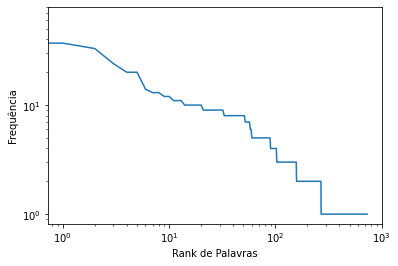

In [17]:
# Importa a biblioteca matplotlib com o nome de 'plt'
import matplotlib.pyplot as plt
%matplotlib inline

# Conta o número de palavras
contador_palavras = sorted(Counter(palavras).values(), reverse=True)

plt.loglog(contador_palavras)
plt.ylabel("Frequência")
plt.xlabel("Rank de Palavras")

## Histogramas de palavras, screen names e hashtags

O código abaixo apresenta histogramas para as palavras, screen names e hashtags. 


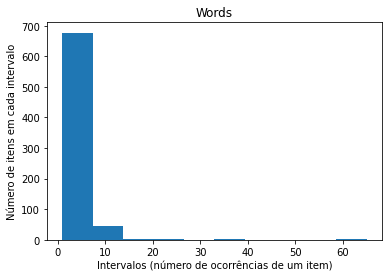

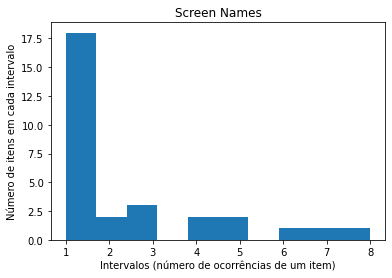

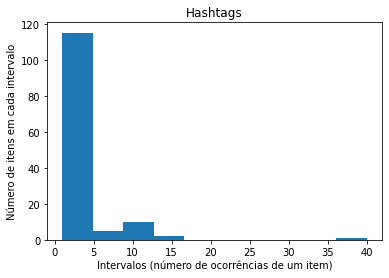

<Figure size 432x288 with 0 Axes>

In [18]:
# Loop que itera sobre os dados de palavras, screen names e hashtags
for label, data in (('Words', palavras), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Cria um mapa de frequência para cada conjunto de dados e plota os valores
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Adiciona um título para o gráfico e um subtítulo para o eixo Y
    plt.title(label)
    plt.ylabel("Número de itens em cada intervalo")
    plt.xlabel("Intervalos (número de ocorrências de um item)")
    
    # ... e mostra como uma nova figura
    plt.figure()

#Exercícios

1. Escreva um código abaixo para buscar a lista de tópicos em tendência na Itália. Você deve se basear no código apresentado acima. 



In [ ]:
# Preencha abaixo com o código para buscar os tópicos na localização WOE = Itália (WOE ID = 23424853). 
#
#


2. Mostre a lista de tópicos na forma de uma tabela. 


In [ ]:
# Preencha abaixo com o código mostrar os tópicos em um tabela 'bonitinha'.
#
#
